In [30]:
import pandas as pd # for dataframes
import numpy as np # for numerical computing and linear algebra data structures and algorithms
from numba import jit # for JIT compilation facilties for improved efficiency

In [31]:
train_tag = pd.read_csv("train_tag.csv")
test_tag = pd.read_csv("test_tag.csv")

C:\Users\justi\AppData\Local\Temp\ipykernel_19964\1599387036.py:1: DtypeWarning: Columns (7,36) have mixed types. Specify dtype option on import or set low_memory=False.
  train_tag = pd.read_csv("train_tag.csv")


## Utility Functions

In [32]:
# all of the types above seem appropriate, so have little to correct there. 
#After checking types, it is useful to check the missing values
def produce_missing_report(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
    return missing_value_df

In [33]:
def reorder_columns(df, column_list):
    # Get a list of column names in the DataFrame that are NOT in the column_list
    other_columns = [col for col in df.columns if col not in column_list]

    # Concatenate the other_columns and the column_list to get the new order of columns
    new_order = other_columns + column_list

    return df[new_order]

In [34]:
def replace_with_mode(s, value):
    mode_value = s.mode()[0]
    s = s.fillna(mode_value)
    if value in s.values:
        s = s.replace({value: mode_value})

    return s

### Train_Tag Cleaning

In [35]:
train_tag.head()

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,...,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,U001B19,0,\N,23,\N,\N,\N,\N,0,0,...,20,0,0,NaN,3,0,1,-1,325,0
1,U0091B9,0,\N,26,\N,\N,\N,\N,0,0,...,10,0,0,NaN,4,0,1,-1,1683,0
2,U00A5E0,0,\N,46,\N,\N,\N,\N,0,0,...,10,0,0,NaN,1,0,1,-1,466,0
3,U00DEC9,0,\N,30,\N,\N,\N,\N,1,0,...,20,1,2,NaN,3,0,3,-1,167,0
4,U01CB9E,0,\N,30,\N,\N,\N,\N,0,0,...,20,0,0,NaN,2,0,2,-1,1,0


In [36]:
train_tag = reorder_columns(train_tag, ['flag'])
train_tag.head()

,id,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,fr_or_sh_ind,...,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,flag
0,U001B19,\N,23,\N,\N,\N,\N,0,0,0,...,0,0,NaN,3,0,1,-1,325,0,0
1,U0091B9,\N,26,\N,\N,\N,\N,0,0,0,...,0,0,NaN,4,0,1,-1,1683,0,0
2,U00A5E0,\N,46,\N,\N,\N,\N,0,0,0,...,0,0,NaN,1,0,1,-1,466,0,0
3,U00DEC9,\N,30,\N,\N,\N,\N,1,0,0,...,1,2,NaN,3,0,3,-1,167,0,0
4,U01CB9E,\N,30,\N,\N,\N,\N,0,0,0,...,0,0,NaN,2,0,2,-1,1,0,0


In [37]:
produce_missing_report(train_tag)

,percent_missing
id,0.000000
gdr_cd,0.000000
age,0.000000
mrg_situ_cd,0.000000
edu_deg_cd,31.149964
acdm_deg_cd,0.002505
deg_cd,52.508579
job_year,0.000000
ic_ind,0.000000
fr_or_sh_ind,0.000000


In [38]:
train_tag.dtypes

id                                 object
gdr_cd                             object
age                                 int64
mrg_situ_cd                        object
edu_deg_cd                         object
acdm_deg_cd                        object
deg_cd                             object
job_year                           object
ic_ind                             object
fr_or_sh_ind                       object
dnl_mbl_bnk_ind                    object
dnl_bind_cmb_lif_ind               object
hav_car_grp_ind                    object
hav_hou_grp_ind                    object
l6mon_agn_ind                      object
frs_agn_dt_cnt                     object
vld_rsk_ases_ind                   object
fin_rsk_ases_grd_cd                object
confirm_rsk_ases_lvl_typ_cd        object
cust_inv_rsk_endu_lvl_cd           object
l6mon_daim_aum_cd                   int64
tot_ast_lvl_cd                     object
pot_ast_lvl_cd                     object
bk1_cur_year_mon_avg_agn_amt_cd   

In [39]:
train_tag.dtypes

id                                 object
gdr_cd                             object
age                                 int64
mrg_situ_cd                        object
edu_deg_cd                         object
acdm_deg_cd                        object
deg_cd                             object
job_year                           object
ic_ind                             object
fr_or_sh_ind                       object
dnl_mbl_bnk_ind                    object
dnl_bind_cmb_lif_ind               object
hav_car_grp_ind                    object
hav_hou_grp_ind                    object
l6mon_agn_ind                      object
frs_agn_dt_cnt                     object
vld_rsk_ases_ind                   object
fin_rsk_ases_grd_cd                object
confirm_rsk_ases_lvl_typ_cd        object
cust_inv_rsk_endu_lvl_cd           object
l6mon_daim_aum_cd                   int64
tot_ast_lvl_cd                     object
pot_ast_lvl_cd                     object
bk1_cur_year_mon_avg_agn_amt_cd   

In [40]:
train_tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39923 entries, 0 to 39922
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id                               39923 non-null  object
 1   gdr_cd                           39923 non-null  object
 2   age                              39923 non-null  int64 
 3   mrg_situ_cd                      39923 non-null  object
 4   edu_deg_cd                       27487 non-null  object
 5   acdm_deg_cd                      39922 non-null  object
 6   deg_cd                           18960 non-null  object
 7   job_year                         39923 non-null  object
 8   ic_ind                           39923 non-null  object
 9   fr_or_sh_ind                     39923 non-null  object
 10  dnl_mbl_bnk_ind                  39923 non-null  object
 11  dnl_bind_cmb_lif_ind             39923 non-null  object
 12  hav_car_grp_ind                 

In [41]:
train_tag['gdr_cd'].value_counts()

M     23015
F     16172
\N      736
Name: gdr_cd, dtype: int64

In [42]:
#Replace '\\N' with the modal class, i.e. M
train_tag['gdr_cd'].replace(to_replace={'\\N': 'M'}, inplace = True)
train_tag['gdr_cd'].value_counts()

M    23751
F    16172
Name: gdr_cd, dtype: int64

In [43]:
train_tag['mrg_situ_cd'].value_counts()

A     19119
B     18598
O      1035
\N      736
~       248
Z       187
Name: mrg_situ_cd, dtype: int64

In [44]:
#Replace '\\N' with the modal class, i.e. A
train_tag['mrg_situ_cd'].replace(to_replace={'A':'Married', 'B':'Never Married', 'O':'Separated',
                                                          '\\N':'Married', '~':'Divorced', 'Z':'Widowed'},
                                 inplace = True)
train_tag['mrg_situ_cd'].value_counts()

Married          19855
Never Married    18598
Separated         1035
Divorced           248
Widowed            187
Name: mrg_situ_cd, dtype: int64

In [45]:
train_tag['edu_deg_cd'].value_counts()

F     6917
C     6695
B     6672
K     2312
Z     2097
G      953
A      889
\N     736
~      108
M       54
L       33
D       20
J        1
Name: edu_deg_cd, dtype: int64

In [46]:
#Replace '\\N' with the modal class, i.e. 0
train_tag['edu_deg_cd'].replace(to_replace={'F':'Bachelors', 'C':'Upper Secondary', 'B':'Post-secondary', 'Z':'Masters',
                                            'K':'Upper Secondary', 'G':'Bachelors', 'A':'Bachelors',  '\\N':'Doctorate', 
                                           '~':'Doctorate', 'M':'Post-secondary', 'L':'Post-secondary', 'D':'Masters',
                                            'J':'Masters'}, inplace = True)
train_tag['edu_deg_cd'].value_counts()

Upper Secondary    9007
Bachelors          8759
Post-secondary     6759
Masters            2118
Doctorate           844
Name: edu_deg_cd, dtype: int64

In [47]:
train_tag['loan_act_ind'].value_counts()

0     37224
1      2206
\N      493
Name: loan_act_ind, dtype: int64

In [48]:
#Replace '\\N' with the modal class, i.e. 0
train_tag['loan_act_ind'].replace(to_replace={'\\N':'0'}, inplace = True)
train_tag['loan_act_ind'].value_counts()

0    37717
1     2206
Name: loan_act_ind, dtype: int64

In [49]:
drop_columns = ['id', 'atdd_type', 'acdm_deg_cd', 'deg_cd', 'dnl_bind_cmb_lif_ind', 'perm_crd_lmt_cd', 'hld_crd_card_grd_cd',
                'l6mon_daim_aum_cd', 'cust_inv_rsk_endu_lvl_cd', 'confirm_rsk_ases_lvl_typ_cd', 'fin_rsk_ases_grd_cd', 
                'bk1_cur_year_mon_avg_agn_amt_cd']

train_tag = train_tag.drop(drop_columns, axis=1)
train_tag.head(10)

,gdr_cd,age,mrg_situ_cd,edu_deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,hav_car_grp_ind,hav_hou_grp_ind,...,ovd_30d_loan_tot_cnt,his_lng_ovd_day,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,flag
0,M,23,Married,Doctorate,0,0,0,0,0,0,...,0,0,0,0,0,1,-1,325,0,0
1,M,26,Married,Doctorate,0,0,0,1,0,0,...,0,0,0,0,0,1,-1,1683,0,0
2,M,46,Married,Doctorate,0,0,0,0,0,0,...,0,0,0,0,0,1,-1,466,0,0
3,M,30,Married,Doctorate,1,0,0,0,1,0,...,0,0,1,2,0,3,-1,167,0,0
4,M,30,Married,Doctorate,0,0,0,0,0,0,...,0,0,0,0,0,2,-1,1,0,0
5,M,45,Married,Doctorate,3,0,1,0,1,0,...,0,0,1,5,0,2,-1,1323,0,0
6,M,38,Married,Doctorate,0,0,0,0,1,0,...,0,0,1,5,0,1,-1,1872,0,0
7,M,34,Married,Doctorate,0,0,0,1,0,0,...,0,0,1,3,0,1,-1,867,0,0
8,M,30,Married,Doctorate,0,0,0,0,0,0,...,0,0,1,2,0,3,-1,256,0,0
9,M,30,Married,Doctorate,1,0,0,0,0,0,...,0,0,1,1,0,2,-1,319,0,0


In [50]:
hold_columns = ['job_year', 'edu_deg_cd', 'ic_ind', 'fr_or_sh_ind', 'dnl_mbl_bnk_ind', 'hav_car_grp_ind', 'hav_hou_grp_ind', 
                'l6mon_agn_ind', 'frs_agn_dt_cnt', 'vld_rsk_ases_ind', 'tot_ast_lvl_cd', 'pot_ast_lvl_cd', 
                'l12mon_buy_fin_mng_whl_tms', 'l12_mon_fnd_buy_whl_tms', 'l12_mon_insu_buy_whl_tms', 'l12_mon_gld_buy_whl_tms',
                'loan_act_ind', 'pl_crd_lmt_cd', 'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day', 'crd_card_act_ind', 
                'l1y_crd_card_csm_amt_dlm_cd', 'cur_debit_cnt', 'cur_credit_cnt',  'cur_debit_min_opn_dt_cnt', 
                'cur_credit_min_opn_dt_cnt', 'cur_debit_crd_lvl']

for column in hold_columns: 
    train_tag[column] = replace_with_mode(train_tag[column], '\\N')
    
train_tag    

C:\Users\justi\AppData\Local\Temp\ipykernel_19964\1920221554.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if value in s.values:
C:\Users\justi\AppData\Local\Temp\ipykernel_19964\1920221554.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if value in s.values:
C:\Users\justi\AppData\Local\Temp\ipykernel_19964\1920221554.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if value in s.values:
C:\Users\justi\AppData\Local\Temp\ipykernel_19964\1920221554.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if value in s.values:
C:\Users\justi\AppData\Local\Temp\ipykernel_19964\1920221554.py:4: FutureWarning: elementwise comparison failed; returning scalar in

,gdr_cd,age,mrg_situ_cd,edu_deg_cd,job_year,ic_ind,fr_or_sh_ind,dnl_mbl_bnk_ind,hav_car_grp_ind,hav_hou_grp_ind,...,ovd_30d_loan_tot_cnt,his_lng_ovd_day,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl,flag
0,M,23,Married,Doctorate,0,0,0,0,0,0,...,0,0,0,0,0,1,-1,325,0,0
1,M,26,Married,Doctorate,0,0,0,1,0,0,...,0,0,0,0,0,1,-1,1683,0,0
2,M,46,Married,Doctorate,0,0,0,0,0,0,...,0,0,0,0,0,1,-1,466,0,0
3,M,30,Married,Doctorate,1,0,0,0,1,0,...,0,0,1,2,0,3,-1,167,0,0
4,M,30,Married,Doctorate,0,0,0,0,0,0,...,0,0,0,0,0,2,-1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39918,M,41,Never Married,Upper Secondary,0,0,1,1,1,0,...,0,0,1,5,1,2,1833,1823,10,0
39919,F,47,Never Married,Upper Secondary,0,0,1,0,0,0,...,0,0,1,3,0,2,-1,752,0,0
39920,M,44,Never Married,Upper Secondary,16,0,0,0,0,0,...,0,0,1,1,0,1,-1,958,0,0
39921,M,29,Married,Upper Secondary,0,0,0,0,1,0,...,0,0,1,5,0,1,-1,1138,0,0


In [51]:
train_tag.columns

Index(['gdr_cd', 'age', 'mrg_situ_cd', 'edu_deg_cd', 'job_year', 'ic_ind',
       'fr_or_sh_ind', 'dnl_mbl_bnk_ind', 'hav_car_grp_ind', 'hav_hou_grp_ind',
       'l6mon_agn_ind', 'frs_agn_dt_cnt', 'vld_rsk_ases_ind', 'tot_ast_lvl_cd',
       'pot_ast_lvl_cd', 'l12mon_buy_fin_mng_whl_tms',
       'l12_mon_fnd_buy_whl_tms', 'l12_mon_insu_buy_whl_tms',
       'l12_mon_gld_buy_whl_tms', 'loan_act_ind', 'pl_crd_lmt_cd',
       'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day', 'crd_card_act_ind',
       'l1y_crd_card_csm_amt_dlm_cd', 'cur_debit_cnt', 'cur_credit_cnt',
       'cur_debit_min_opn_dt_cnt', 'cur_credit_min_opn_dt_cnt',
       'cur_debit_crd_lvl', 'flag'],
      dtype='object')

In [52]:
old_col = ['gdr_cd', 'age', 'mrg_situ_cd', 'edu_deg_cd', 'job_year', 'ic_ind', 'fr_or_sh_ind', 'dnl_mbl_bnk_ind',
           'hav_car_grp_ind', 'hav_hou_grp_ind', 'l6mon_agn_ind', 'frs_agn_dt_cnt', 'vld_rsk_ases_ind', 'tot_ast_lvl_cd',
           'pot_ast_lvl_cd', 'l12mon_buy_fin_mng_whl_tms', 'l12_mon_fnd_buy_whl_tms', 'l12_mon_insu_buy_whl_tms', 
           'l12_mon_gld_buy_whl_tms', 'loan_act_ind', 'pl_crd_lmt_cd', 'ovd_30d_loan_tot_cnt', 'his_lng_ovd_day', 
           'crd_card_act_ind', 'l1y_crd_card_csm_amt_dlm_cd', 'cur_debit_cnt', 'cur_credit_cnt', 'cur_debit_min_opn_dt_cnt', 
           'cur_credit_min_opn_dt_cnt', 'cur_debit_crd_lvl', 'flag']

new_col = ['Gender', 'Age', 'Marital Status', 'Education', 'Years Worked', 'Commercial', 'Shareholder', 'Has App', 'Owns Car', 
           'Owns House','Wages Paid', 'Last Payment', 'Investment Risk', 'Total Asset Code', 'Potential Asset Code', 
           'Financial Producs', 'Fund Purchases', 'Insurance Purchases', 'Gold Purchases', 'Has Loan', 'Total Loans', 
           'Overdue Loans', 'Overdue Days', 'Has Credit Cards', 'Credit Use', 'Debit Cards', 'Credit Cards', 'Debit ', 
           'Credit', 'Debit Card Level', 'Flag']

print(len(old_col), len(new_col))

31 31


In [53]:
col_dict = {old_col: new_col for old_col, new_col in zip(old_col, new_col)}

train_tag.rename(columns = col_dict, inplace = True)
train_tag.head()

,Gender,Age,Marital Status,Education,Years Worked,Commercial,Shareholder,Has App,Owns Car,Owns House,...,Overdue Loans,Overdue Days,Has Credit Cards,Credit Use,Debit Cards,Credit Cards,Debit,Credit,Debit Card Level,Flag
0,M,23,Married,Doctorate,0,0,0,0,0,0,...,0,0,0,0,0,1,-1,325,0,0
1,M,26,Married,Doctorate,0,0,0,1,0,0,...,0,0,0,0,0,1,-1,1683,0,0
2,M,46,Married,Doctorate,0,0,0,0,0,0,...,0,0,0,0,0,1,-1,466,0,0
3,M,30,Married,Doctorate,1,0,0,0,1,0,...,0,0,1,2,0,3,-1,167,0,0
4,M,30,Married,Doctorate,0,0,0,0,0,0,...,0,0,0,0,0,2,-1,1,0,0


Need to one hot encode Gender,Marital Status and Education.

In [54]:
from sklearn.preprocessing import OneHotEncoder
#helper function for one hot encoding
def encode(df,col):
    one_hot = OneHotEncoder()
    encoded = one_hot.fit_transform(df[[col]])
    df[one_hot.categories_[0]] = encoded.toarray()

In [55]:
train_tag['Gender'] = train_tag['Gender'].replace(['M','F'], ['Male','Female'])

In [56]:
encode(train_tag,'Gender')

In [57]:
train_tag.head()

,Gender,Age,Marital Status,Education,Years Worked,Commercial,Shareholder,Has App,Owns Car,Owns House,...,Has Credit Cards,Credit Use,Debit Cards,Credit Cards,Debit,Credit,Debit Card Level,Flag,Female,Male
0,Male,23,Married,Doctorate,0,0,0,0,0,0,...,0,0,0,1,-1,325,0,0,0.0,1.0
1,Male,26,Married,Doctorate,0,0,0,1,0,0,...,0,0,0,1,-1,1683,0,0,0.0,1.0
2,Male,46,Married,Doctorate,0,0,0,0,0,0,...,0,0,0,1,-1,466,0,0,0.0,1.0
3,Male,30,Married,Doctorate,1,0,0,0,1,0,...,1,2,0,3,-1,167,0,0,0.0,1.0
4,Male,30,Married,Doctorate,0,0,0,0,0,0,...,0,0,0,2,-1,1,0,0,0.0,1.0


In [58]:
encode(train_tag,'Marital Status')

In [59]:
train_tag.head()

,Gender,Age,Marital Status,Education,Years Worked,Commercial,Shareholder,Has App,Owns Car,Owns House,...,Credit,Debit Card Level,Flag,Female,Male,Divorced,Married,Never Married,Separated,Widowed
0,Male,23,Married,Doctorate,0,0,0,0,0,0,...,325,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,Male,26,Married,Doctorate,0,0,0,1,0,0,...,1683,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,Male,46,Married,Doctorate,0,0,0,0,0,0,...,466,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,Male,30,Married,Doctorate,1,0,0,0,1,0,...,167,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,Male,30,Married,Doctorate,0,0,0,0,0,0,...,1,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [60]:
train_tag['Education'].value_counts()

Upper Secondary    21443
Bachelors           8759
Post-secondary      6759
Masters             2118
Doctorate            844
Name: Education, dtype: int64

In [62]:
#creating new column with mapped values of education level
edu_level_map = {'Upper Secondary':0,'Post-secondary':1,'Bachelors':2,'Masters':3,'Doctorate':4}
train_tag['Education Level'] = train_tag['Education'].map(edu_level_map)

In [64]:
train_tag['Education Level'].value_counts()

0    21443
2     8759
1     6759
3     2118
4      844
Name: Education Level, dtype: int64

In [65]:
#rearranging columns to set Flag column as last column
cols = list(train_tag.columns.values) 
cols.pop(cols.index('Flag')) 
train_tag = train_tag[cols+['Flag']]
train_tag.head()

,Gender,Age,Marital Status,Education,Years Worked,Commercial,Shareholder,Has App,Owns Car,Owns House,...,Debit Card Level,Female,Male,Divorced,Married,Never Married,Separated,Widowed,Education Level,Flag
0,Male,23,Married,Doctorate,0,0,0,0,0,0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4,0
1,Male,26,Married,Doctorate,0,0,0,1,0,0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4,0
2,Male,46,Married,Doctorate,0,0,0,0,0,0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4,0
3,Male,30,Married,Doctorate,1,0,0,0,1,0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4,0
4,Male,30,Married,Doctorate,0,0,0,0,0,0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4,0


In [66]:
train_tag.drop(['Gender','Age','Marital Status','Education'],axis=1)

,Years Worked,Commercial,Shareholder,Has App,Owns Car,Owns House,Wages Paid,Last Payment,Investment Risk,Total Asset Code,...,Debit Card Level,Female,Male,Divorced,Married,Never Married,Separated,Widowed,Education Level,Flag
0,0,0,0,0,0,0,0,-1,0,-1,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4,0
1,0,0,0,1,0,0,0,-1,0,-1,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4,0
2,0,0,0,0,0,0,0,-1,0,-1,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4,0
3,1,0,0,0,1,0,0,-1,0,-1,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4,0
4,0,0,0,0,0,0,0,-1,0,-1,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39918,0,0,1,1,1,0,0,-1,0,3,...,10,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
39919,0,0,1,0,0,0,0,-1,0,-1,...,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0
39920,16,0,0,0,0,0,0,-1,0,-1,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
39921,0,0,0,0,1,0,0,-1,0,-1,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0


In [ ]:
#export cleaned train tag as csv file
#train_tag.to_csv('./Data/cleaned_train_tag.csv')

### Test Tag Cleaning 

will insert later

## EDA

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

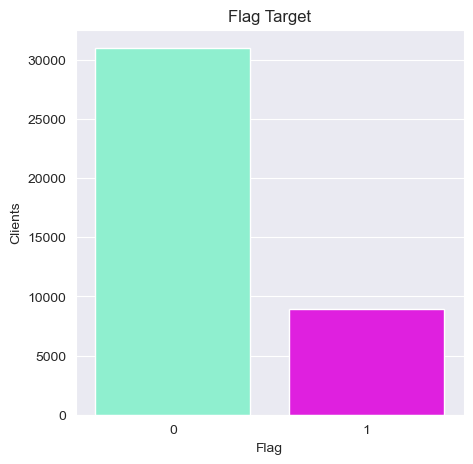

In [68]:
sns.set_style('darkgrid')
plt.figure(figsize = (5,5))
sns.countplot(data=train_tag,x='Flag', palette= ['aquamarine','magenta'])
plt.title('Flag Target')
plt.ylabel('Clients')
plt.show()

In [75]:
flag_pred = train_tag.drop(['Flag'],1)
flag_pred.head()

C:\Users\justi\AppData\Local\Temp\ipykernel_19964\3224494026.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  flag_pred = train_tag.drop(['Flag'],1)


,Gender,Age,Marital Status,Education,Years Worked,Commercial,Shareholder,Has App,Owns Car,Owns House,...,Credit,Debit Card Level,Female,Male,Divorced,Married,Never Married,Separated,Widowed,Education Level
0,Male,23,Married,Doctorate,0,0,0,0,0,0,...,325,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4
1,Male,26,Married,Doctorate,0,0,0,1,0,0,...,1683,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4
2,Male,46,Married,Doctorate,0,0,0,0,0,0,...,466,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4
3,Male,30,Married,Doctorate,1,0,0,0,1,0,...,167,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4
4,Male,30,Married,Doctorate,0,0,0,0,0,0,...,1,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4


In [76]:
flag_pred.corr()

C:\Users\justi\AppData\Local\Temp\ipykernel_19964\94404272.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  flag_pred.corr()


,Age,Total Loans,Debit Cards,Credit Cards,Debit,Credit,Debit Card Level,Female,Male,Divorced,Married,Never Married,Separated,Widowed,Education Level
Age,1.000000,0.056408,0.103328,-0.066088,0.317575,0.269197,0.182773,0.003001,-0.003001,-0.008465,-0.525763,0.524111,-0.003970,0.039992,-0.013347
Total Loans,0.056408,1.000000,0.323847,0.029370,0.162725,0.119948,0.235038,-0.027796,0.027796,0.001855,-0.021415,0.032976,-0.030349,-0.015595,0.033912
Debit Cards,0.103328,0.323847,1.000000,0.010095,0.316262,0.131378,0.354106,-0.020571,0.020571,0.008843,-0.026732,0.045204,-0.049446,-0.029595,0.103597
Credit Cards,-0.066088,0.029370,0.010095,1.000000,-0.046621,0.081163,-0.011600,-0.027696,0.027696,0.003546,0.030299,-0.023958,-0.021832,-0.000111,0.010254
Debit,0.317575,0.162725,0.316262,-0.046621,1.000000,0.436897,0.565033,0.024264,-0.024264,0.037062,-0.062117,0.076051,-0.040314,-0.049568,0.120688
Credit,0.269197,0.119948,0.131378,0.081163,0.436897,1.000000,0.190878,0.066608,-0.066608,-0.008798,-0.007990,0.025034,-0.041298,-0.018144,-0.089708
Debit Card Level,0.182773,0.235038,0.354106,-0.011600,0.565033,0.190878,1.000000,-0.010358,0.010358,0.031584,-0.047265,0.088848,-0.114116,-0.073749,0.282508
Female,0.003001,-0.027796,-0.020571,-0.027696,0.024264,0.066608,-0.010358,1.000000,-1.000000,-0.001597,-0.054889,0.055985,-0.005541,0.007660,-0.091039
Male,-0.003001,0.027796,0.020571,0.027696,-0.024264,-0.066608,0.010358,-1.000000,1.000000,0.001597,0.054889,-0.055985,0.005541,-0.007660,0.091039
Divorced,-0.008465,0.001855,0.008843,0.003546,0.037062,-0.008798,0.031584,-0.001597,0.001597,1.000000,-0.078641,-0.073834,-0.012898,-0.005424,0.082143


C:\Users\justi\AppData\Local\Temp\ipykernel_19964\760804176.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(flag_pred.corr(),annot=True, center=0,linewidths=0.5,ax=ax);


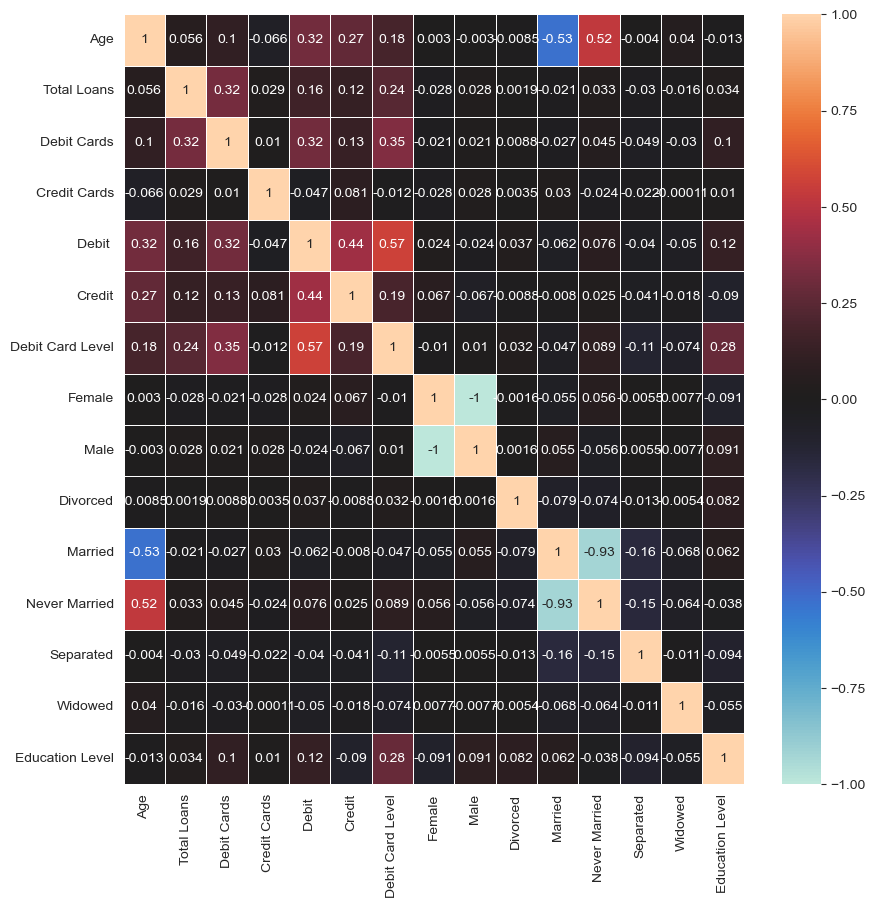

In [81]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(flag_pred.corr(),annot=True, center=0,linewidths=0.5,ax=ax);

# SMOTE

smote code here

## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [96]:
X = train_tag.drop(['Gender','Marital Status','Education','Flag'],1)
y = train_tag['Flag']

C:\Users\justi\AppData\Local\Temp\ipykernel_19964\2743292261.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train_tag.drop(['Gender','Marital Status','Education','Flag'],1)


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [98]:
X_train.head()

,Age,Years Worked,Commercial,Shareholder,Has App,Owns Car,Owns House,Wages Paid,Last Payment,Investment Risk,...,Credit,Debit Card Level,Female,Male,Divorced,Married,Never Married,Separated,Widowed,Education Level
20866,28,2,0,0,1,1,0,0,409,0,...,1816,10,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
36226,28,0,0,0,0,1,0,0,-1,0,...,931,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
3758,53,8,0,0,0,0,0,0,-1,0,...,340,10,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
7647,32,0,0,0,1,0,0,1,62,1,...,94,10,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
29238,29,1,0,0,1,1,0,0,-1,0,...,1719,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0


In [99]:
y_train.head()

20866    0
36226    0
3758     0
7647     0
29238    0
Name: Flag, dtype: int64

In [100]:
train_tag['Gender'].value_counts()

Male      23751
Female    16172
Name: Gender, dtype: int64

In [101]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [102]:
y_pred = rf.predict(X_test)

In [103]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7704445835942392


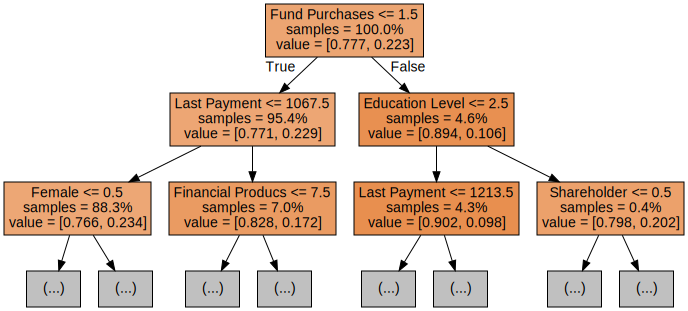

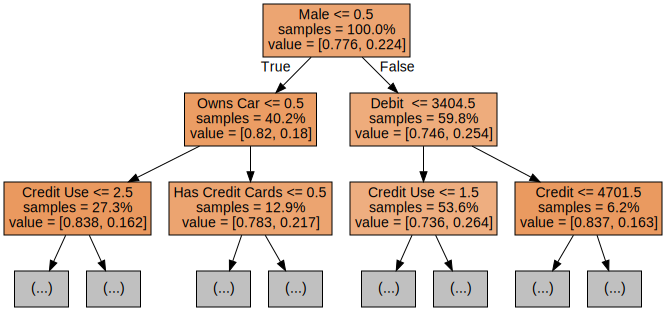

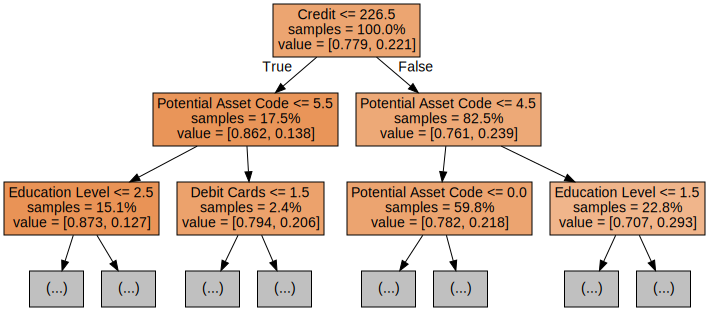

In [104]:
# Show the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

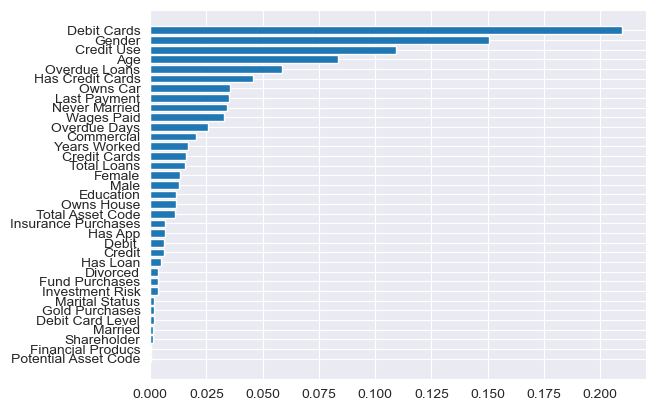

In [106]:
#determine important features in model
import matplotlib.pyplot as plt
features = list(train_tag.columns.values)
f_i = list(zip(features,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

plt.show()